# Численное решение модифицированного уравнения теплопроводности

Рассмотрим одномерный гармонический кристалл длины $L$.

Уравнение теплопроводности, описывающее процесс теплопередачи в рассматриваемом кристалле:

$$\displaystyle{}\frac{\partial^2 T}{\partial t^2}+\frac{1}{t}\frac{\partial T}{\partial t}=c^2\frac{\partial^2 T}{\partial x^2},$$

где $T(x,t)$ - функция температуры от координаты $x$ и времени $t$; $c$ - скорость звука в одномерном кристалле

Зададим распределение температуры по длине кристалла в начальный момент времени и функции температуры (от времени) на концах кристалла:

1) $T|_{t=0}=T(x,0)=T_0(x)$ (начальное условие на функцию температуры)

2) $\dot{T}|_{t=0}=\dot{T}(x,0)=0$ (начальное условие на производную функции температуры)

3) $T(0,t)=T_0(t)$ (граничное условие первого рода на левом конце)

4) $T(L,t)=T_L(t)$ (граничное условие первого рода на правом конце)


Решаем уравнение явным методом. Представим производные в виде конечных разностей

$$\displaystyle{}\frac{\partial T}{\partial t}\bigg|_{x_m,t_n}=\frac{T_m^{n+1}-T_m^n}{\tau}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial t^2}\bigg|_{x_m,t_n}=\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial x^2}\bigg|_{x_m,t_n}=\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{\tau^2}$$

$$\displaystyle{}\frac{1}{t}\bigg|_{t_n}=\frac{1}{n\tau}$$

Подставляем в исходное уравнение:

$$\displaystyle{}\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}+\frac{1}{n\tau}\frac{T_m^{n+1}-T_m^n}{\tau}=c^2\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{h^2}$$

Преобразуем:

$$\displaystyle{}\frac{n\left(T_m^{n-1}-2T_m^n\right)+\left(n+1\right)T_m^{n+1}-T_m^n}{n\tau^2}=c^2\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{h^2}$$

$$\displaystyle{}\left(n+1\right)T_m^{n+1}=\frac{c^2n\tau^2}{h^2}\left(T_{m-1}^n-2T_m^n+T_{m+1}^n\right)-n\left(T_m^{n-1}-2T_m^n\right)+T_m^n$$

И получаем формулу явной схемы:

$$\displaystyle{}T_m^{n+1}=\frac{T_m^n}{n+1}-\frac{n}{n+1}\left(T_m^{n-1}-2T_m^n\right)+\frac{c^2n\tau^2}{(n+1)h^2}\left(T_{m-1}^n-2T_m^n+T_{m+1}^n\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
# from matplotlib import cm, colors

ipympl_spec = importlib.util.find_spec('ipympl')
found = ipympl_spec is not None

if found:
    %matplotlib widget
else:
    %matplotlib notebook

In [2]:
l_dist = 0.5
A = 5
alpha = 5

c = 1
total_time = 1.5

L = 5

height = 1000
width = 1000
dt = total_time / height
h = L / width


In [3]:
T = np.zeros([height + 1, width + 1])
der_T = np.zeros([height + 1, width + 1])

for i in range(width + 1):
    T[0, i] = np.exp(-alpha * (i * h - L/2)**2)
    T[1, i] = np.exp(-alpha * (i * h - L/2)**2)
    der_T[0, i] = 1
    
for k in range(height + 1):
    T[k, 0] = 0
    T[k, width] = 0

In [4]:
for n in range(1, height):
    for m in range(1, width):
        T[n+1][m] = T[n][m]/(n+1) - n/(n+1)*(T[n-1][m]-2*T[n][m])+c**2*n*dt**2/((n+1)*h**2)*(T[n][m-1]-2*T[n][m]+T[n][m+1])

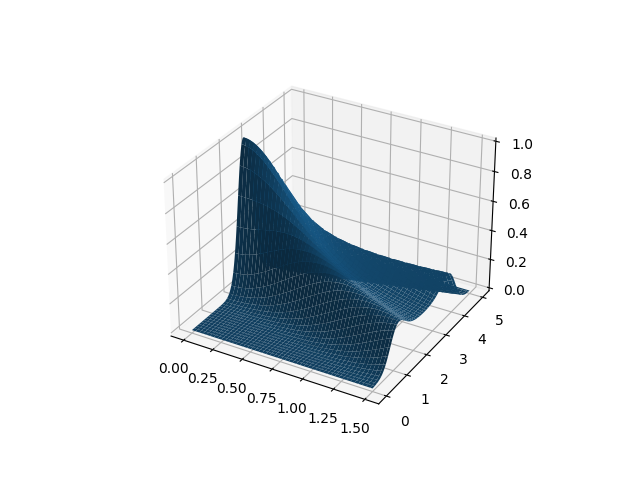

In [5]:
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
Length, Time = np.meshgrid(np.linspace(0, L, width+1), np.linspace(0, total_time, height+1))
ax1.plot_surface(Time, Length, T)

In [6]:
#for k in range(1, height + 1):
#    for i in range(1, width):
#        der_T[k, i] = (1 - 1/k) * der_T[k-1, i] + c**2*dt/h**2 * (T[k-1, i+1] - 2 * T[k-1, i] + T[k-1, i-1])
#        T[k, i] = T[k-1, i] + der_T[k, i] * dt

In [7]:
T = np.zeros([height + 1, width + 1])
der_T = np.zeros([height + 1, width + 1])

for i in range(width + 1):
    T[0, i] = np.exp(-alpha * (i * h - L/2)**2)
    T[1, i] = np.exp(-alpha * (i * h - L/2)**2)
    der_T[0, i] = 1
    
for k in range(height + 1):
    T[k, 0] = 0
    T[k, width] = 0

In [8]:
for n in range(1, height):
    alpha = np.zeros([width+1])
    beta = np.zeros([width+1])

    for m in range(1, width):

        B = c**2/h**2
        C = (n+2)/((n+1)*dt**2) + 2*c**2/h**2
        A = c**2/h**2
        F = 3/((n+1)*dt**2) * T[n][m] - T[n-1][m]/((n+1)*dt**2)
        alpha[m] = B / (C - A * alpha[m-1])
        
        beta[m] = (A * beta[m-1] + F)/(C-A*alpha[m-1])


    for m in range(width-1, 0, -1):
        T[n+1][m-1] = alpha[m-1] * T[n+1][m] + beta[m-1]

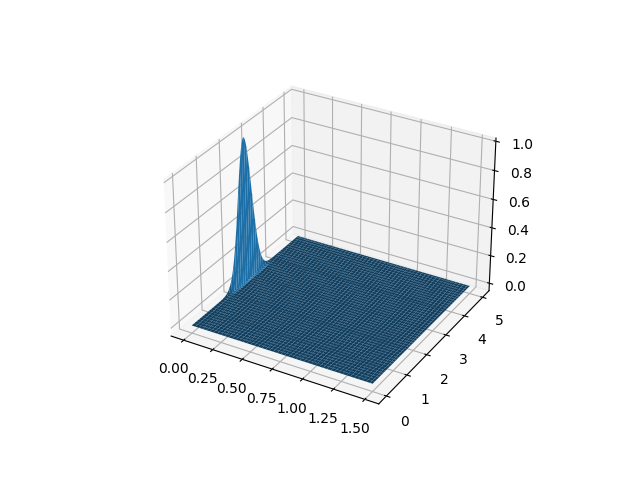

In [9]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
Length, Time = np.meshgrid(np.linspace(0, L, width+1), np.linspace(0, total_time, height+1))
ax2.plot_surface(Time, Length, T)